# Semi-Project 2

## 1. 데이터셋 준비

## Disease Dataset

In [248]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv("C:/Users/4ser/Downloads/disease_dataset/diabetes_data.csv", encoding='utf-8', engine='python')
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Diabetes'], axis=1), df[['Diabetes']], test_size=0.2, shuffle=True, random_state=33)
df = pd.concat([x_train, y_train], axis=1).reset_index(drop=True)

df.drop(['Age'], axis=1, inplace=True)

df.head()

,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.0,1.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,10.0,20.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,30.0,0.0,1.0,0.0,1.0,1.0


### 당뇨병 데이터셋 column 설명
---
| 칼럼명 | 요소1 | 요소2 |  |  |  | 의미 |
| --- | --- | --- | --- | --- | --- | --- |
| Age |  |  |  |  |  | 나이 |
| Sex | 0 = 여성 | 1 = 남성 |  |  |  | 성별 |
| HighChol | 0 = no | 1 = yes |  |  |  | 콜레스테롤 수치가 높은지? |
| CholCheck | 0 = no | 1 = yes |  |  |  | 5년동안 콜레스테롤 수치를 체크 했는지 |
| BMI |  |  |  |  |  | 저체중 18.5미만 <br> 정상 18.5 ~ 24.9 <br> 과체중 25 ~ 29.9 <br> 비만 30~ |
| Smoker | 0 = no | 1 = yes |  |  |  | 평생 핀 담배 수가 100개비 이상 |
| PhysActivity | 0 = no | 1 = yes |  |  |  | physical activity in past 30 days - not including job <br> 30일 내에 운동을 했는지 여부 |
| Fruits | 0 = no | 1 = yes |  |  |  | 하루에 과일을 한번이상 먹는지 |
| Veggies | 0 = no | 1 = yes |  |  |  | 하루에 채소를 한번이상 먹는지 |
| HvyAlcoholConsump | 0 = no | 1 = yes |  |  |  | 한 주에 일정 횟수 이상 음주여부 <br> 남자: 14번이상 <br> 여자:7번 이상 |
| GenHlth | 1 = excellent | 2 = very good | 3 = good | 4 = fair  | 5 = poor | Would you say that in general your health is:평소 자신의 건강상태에 대한 답변 |
| MentHlth | scale = 1~30 |  |  |  |  | days of poor mental health scale 1-30 days : 정신건강이 안좋은 날 수 |
| PhysHlth | scale 1-30 |  |  |  |  | physical illness or injury days in past 30 days scale 1-30 : 지난 30일 내 물리적 질환/부상일수 |
| DiffWalk | 0 = no | 1 = yes |  |  |  | Do you have serious difficulty walking or climbing stairs? : 걷기나 계단오르기에 어려움이 있는지 |
| Stroke | 0 = no | 1 = yes |  |  |  | you ever had a stroke. : 뇌졸증 걸린적이 있는지 |
| HighBP | 0 = no  | 1 = yes |  |  |  | 혈압이 높은지 |
| Diabetes | 0 = no | 1 = yes |  |  |  | 당뇨병인지 |
| HeartDiseaseorAttack | 0 = no | 1 = yes |  |  |  | coronary heart disease (CHD) or myocardial infarction (MI) : 코로나 심장질환 유무 or 심근경색 유뮤 |

## 2.EDA

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56553 entries, 50498 to 23572
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   56553 non-null  float64
 1   Sex                   56553 non-null  float64
 2   HighChol              56553 non-null  float64
 3   CholCheck             56553 non-null  float64
 4   BMI                   56553 non-null  float64
 5   Smoker                56553 non-null  float64
 6   HeartDiseaseorAttack  56553 non-null  float64
 7   PhysActivity          56553 non-null  float64
 8   Fruits                56553 non-null  float64
 9   Veggies               56553 non-null  float64
 10  HvyAlcoholConsump     56553 non-null  float64
 11  GenHlth               56553 non-null  float64
 12  MentHlth              56553 non-null  float64
 13  PhysHlth              56553 non-null  float64
 14  DiffWalk              56553 non-null  float64
 15  Stroke         

In [155]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000
mean,8.596131,0.457447,0.526179,0.975174,29.870122,0.475766,0.148922,0.702279,0.611108,0.788800,0.042668,2.838753,3.732587,5.811752,0.252506,0.061995,0.564426,0.501671
std,2.847163,0.498190,0.499319,0.155597,7.111446,0.499417,0.356015,0.457260,0.487503,0.408164,0.202109,1.112712,8.140945,10.069800,0.434454,0.241148,0.495836,0.500002
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,5.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [157]:
df.Diabetes.value_counts()

1.0    28371
0.0    28182
Name: Diabetes, dtype: int64

In [158]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
50498,13.0,0.0,1.0,1.0,32.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
44300,10.0,0.0,1.0,1.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,10.0,20.0,0.0,0.0,1.0,1.0
49497,8.0,1.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0
62520,9.0,1.0,0.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0
52032,10.0,0.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,30.0,0.0,1.0,0.0,1.0,1.0


In [159]:
df.shape

(56553, 18)

### 상관관계 확인

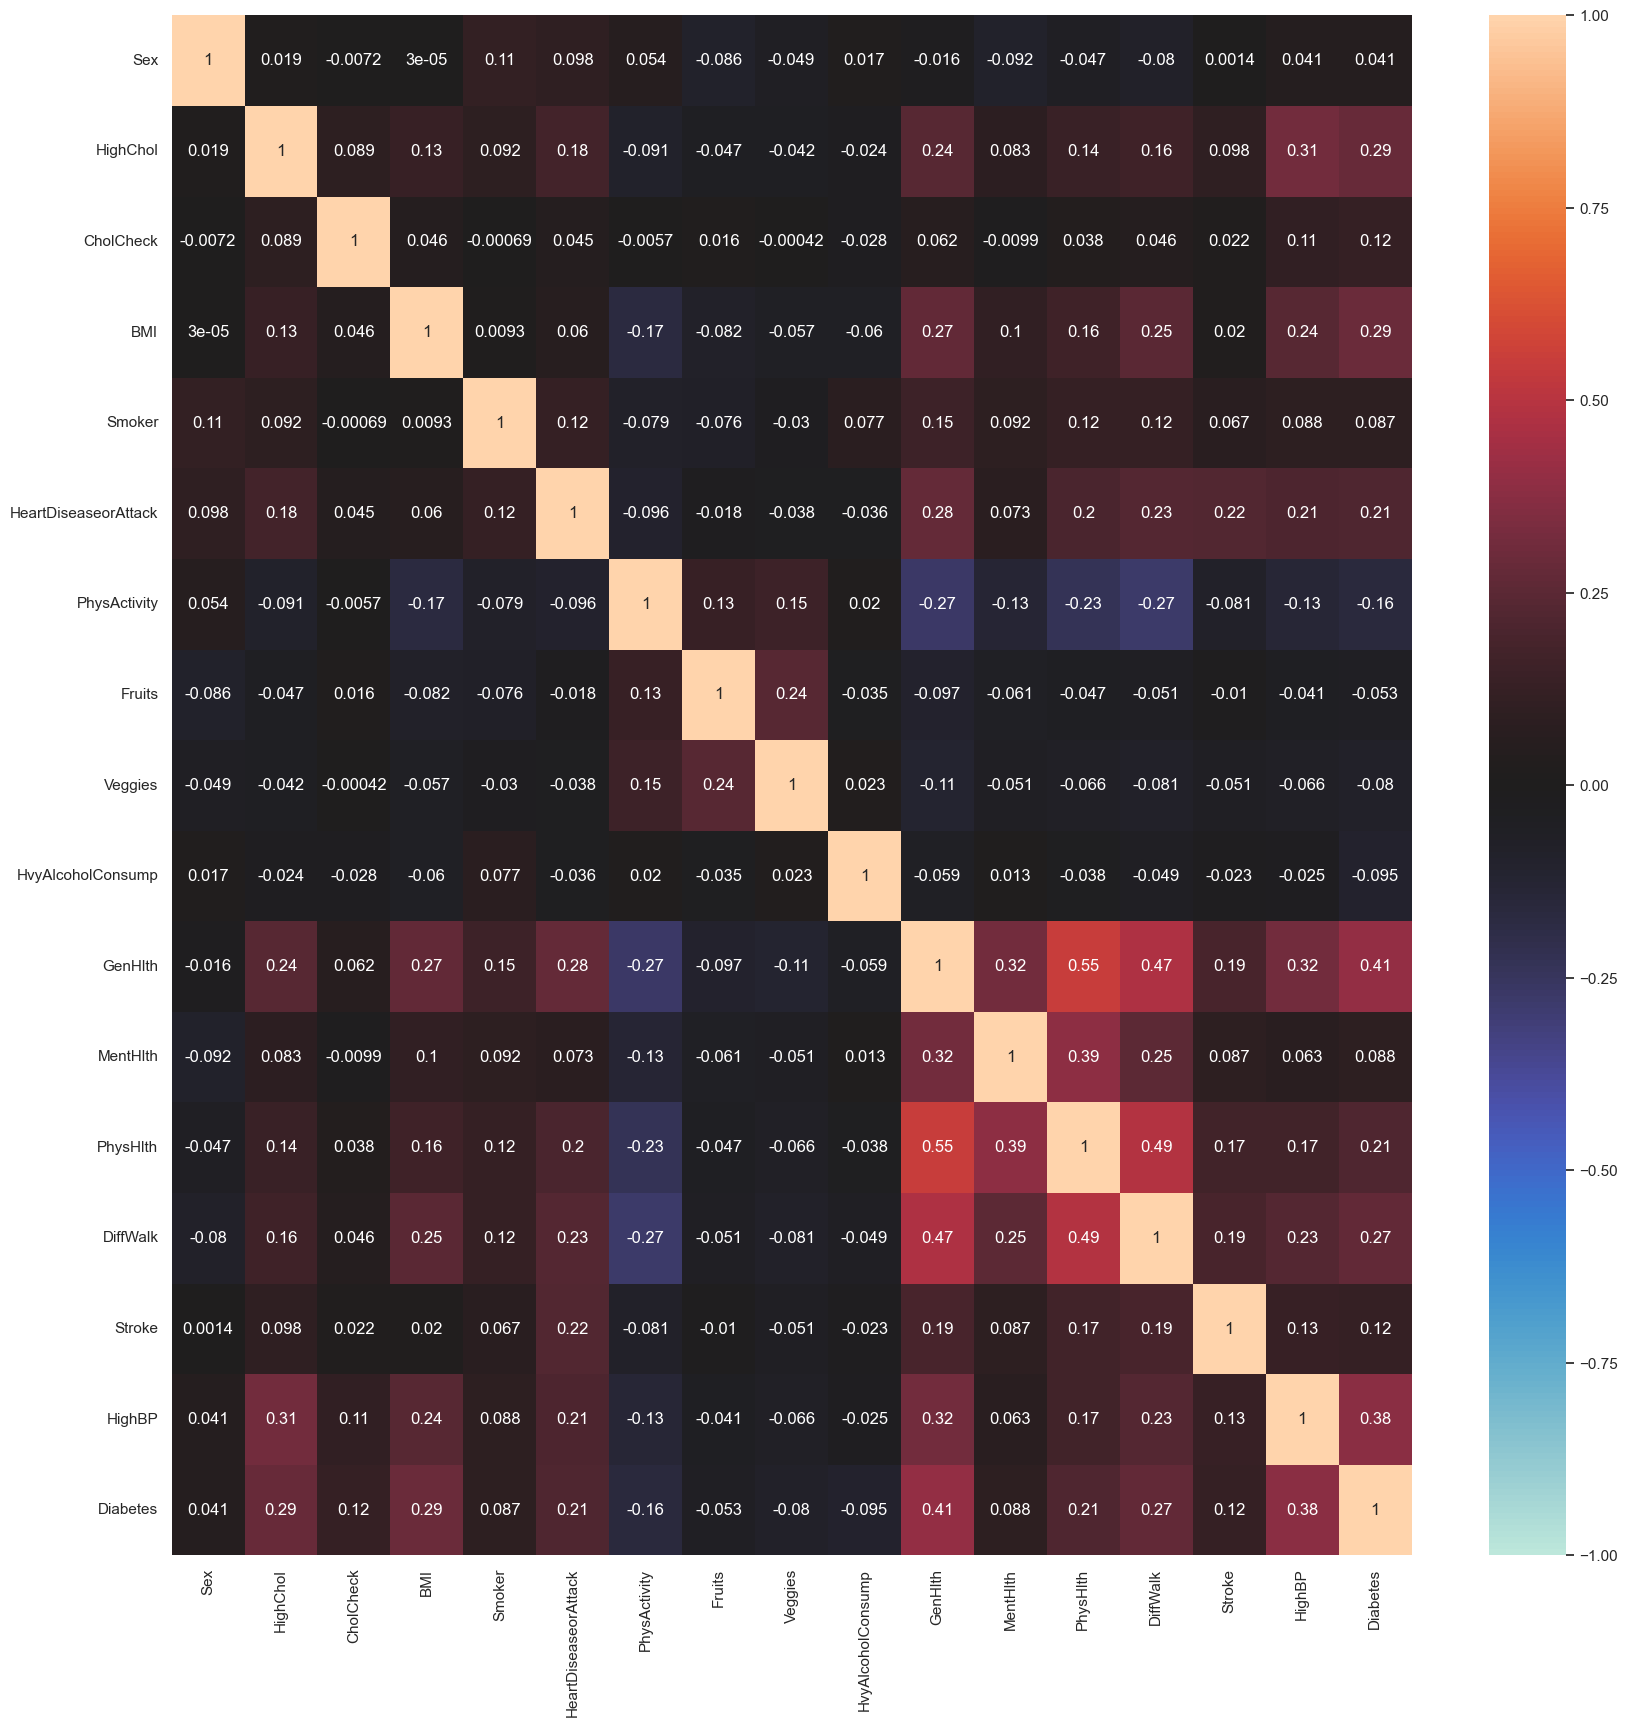

In [275]:
# VSCode 캐시 데이터 오류로 느려 터져서 안함.
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 20)

# df.drop(['Age'], axis=1, inplace=True)

sns.heatmap(data=df.corr(), annot=True, vmax=1, vmin=-1, cmap='icefire')
plt.show()

### 다중공선성 확인

1. DiffWalk, PhysHlth, MentHlth => 내비 둠. 분산팽창요인이 10이하로 낮게 잡혀서 다중공선성이 존재하지 않음. (순서대로, 2.017862 : 1.989900, 1.477509)
2. GenHlth => 삭제 권장, 분산팽창요인이 **13.102441**, column 자체가 관측 대상에게 직접 물은 내용이기 때문에 관측자의 주관에 따라 편향된 데이터일 가능성이 있음.
   1. MentHlth, PhysHlth, DiffWalk column과의 상관관계가 매우 높은데, 멘탈이 안좋거나 30일 이내에 물리적 부상을 당했거나 계단 오르기가 힘들면 관측자의 주관에 따라 나 몸 안좋아요~ 라고 체크할 수 있는 것.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.copy()
X.drop(['CholCheck', 'BMI'], axis=1, inplace=True)
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df['Feature'] = X.columns
vif_df

,VIF,Feature
0,1.819811,Sex
1,2.398255,HighChol
2,1.934821,Smoker
3,1.365295,HeartDiseaseorAttack
4,3.063377,PhysActivity
5,2.614952,Fruits
6,4.000753,Veggies
7,1.062857,HvyAlcoholConsump
8,1.432812,MentHlth
9,1.978796,PhysHlth


In [161]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

### 3. 각 변수별 시각화

### 주용

In [ ]:
train_df= df.copy()

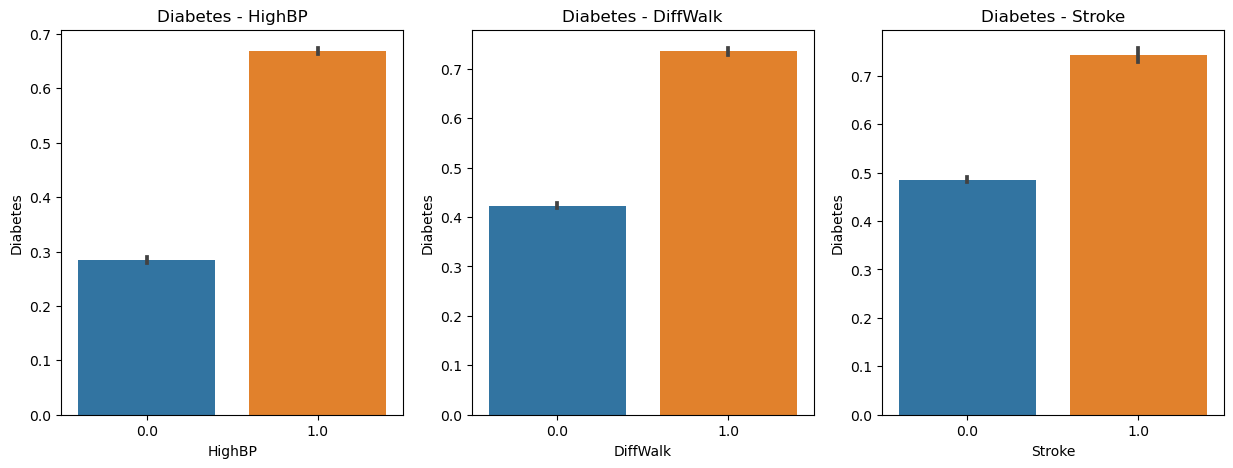

In [9]:
# 그래프 객체 3개 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


# 1번 그래프 x축, y축에 변수 할당
sns.barplot(x='HighBP', y='Diabetes', data=train_df, ax=ax1)

# 2번 그래프 x축, y축에 변수 할당
sns.barplot(x='DiffWalk', y='Diabetes', data=train_df, ax=ax2)

# 3번 그래프 x축, y축에 변수 할당
sns.barplot(x='Stroke', y='Diabetes', data=train_df, ax=ax3)


# 차트 제목 표시
ax1.set_title('Diabetes - HighBP')
ax2.set_title('Diabetes - DiffWalk')
ax3.set_title('Diabetes - Stroke')

plt.show()

- 고혈압, 걷거나 계단 오를때 불편한지, 뇌졸증을 겪었는지 와 당뇨병의 각 각의 상관관계를 봤는데 모두 당뇨병과 상관관계가 있어보였다.
- 그 중 고혈압과 당뇨병의 상관관계가 제일 높아보였는데, 고혈압이 높을 때 보다 낮을 때 확실히 당뇨병 발병률이 낮았다.

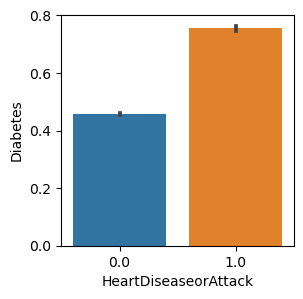

In [31]:
# 그래프 객체 생성 및 x, y 값 할당
fig = plt.figure(figsize=(3, 3))
sns.barplot(x='HeartDiseaseorAttack', y='Diabetes', data=train_df)
plt.show()

- 심장 관련 질환과 당뇨병의 상관관계도 보는 바와 같이 상관관계가 있어보이고, 역시 발병했던 경험이 있는 사람이 당뇨병에 걸릴 확률이 높아 보였다.

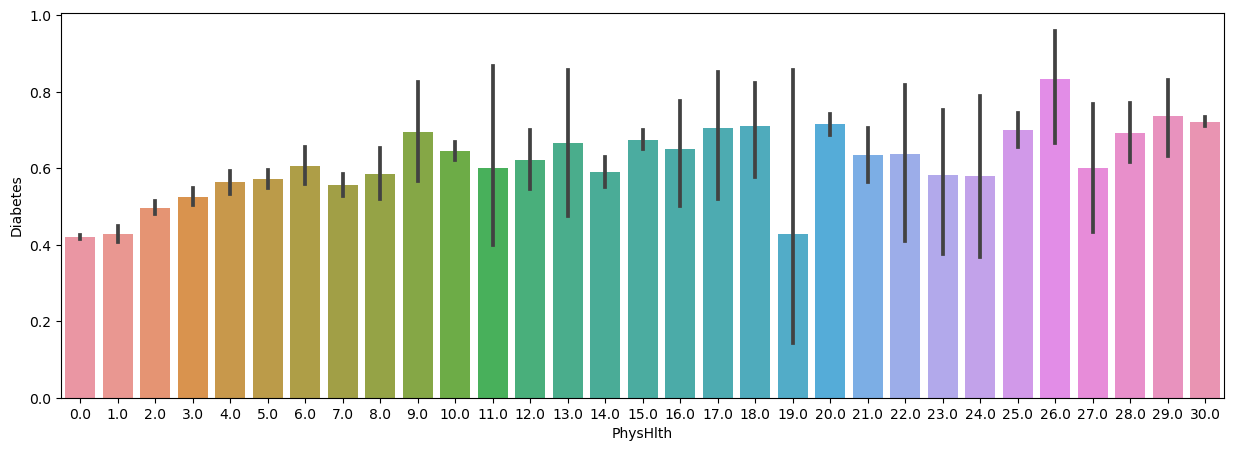

In [10]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))

# x축, y축에 변수 할당
sns.barplot(x='PhysHlth', y='Diabetes', data=train_df)
plt.show()

- 지난 한달동안 물리적인 부상을 입은 날짜와 당뇨병의 상관관계를 봤을땐 약간의 우상향을 보여 관계가 있지만 크진 않은것으로 보인다.

### 광환

In [24]:
eda_df = df.copy()

In [25]:
eda_df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [26]:
# 이진분류 데이터 이름 바꾸기
eda_df.loc[eda_df.HighChol == 0, 'HighChol'] = 'High-Cholesterol'
eda_df.loc[eda_df.HighChol == 1, 'HighChol'] = 'Non High-Cholesterol'

eda_df.loc[eda_df.CholCheck == 0, 'CholCheck'] = 'Checked'
eda_df.loc[eda_df.CholCheck == 1, 'CholCheck'] = 'Not Checked'

eda_df.loc[eda_df.Smoker == 0, 'Smoker'] ='Smoker'
eda_df.loc[eda_df.Smoker == 1, 'Smoker'] = 'Non Smoker'

eda_df.loc[eda_df.Sex == 0, 'Sex'] ='Female'
eda_df.loc[eda_df.Sex == 1, 'Sex'] = 'male'

In [27]:
eda_df.Age.unique()

array([ 4., 12., 13., 11.,  8.,  1.,  6.,  3.,  7., 10.,  9.,  5.,  2.])

In [28]:
print(eda_df.HighChol.unique())
print(eda_df.CholCheck.unique())
print(eda_df.Smoker.unique())

['High-Cholesterol' 'Non High-Cholesterol']
['Not Checked' 'Checked']
['Smoker' 'Non Smoker']


### 1. 변수간 상관관계

In [30]:
x_train.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')

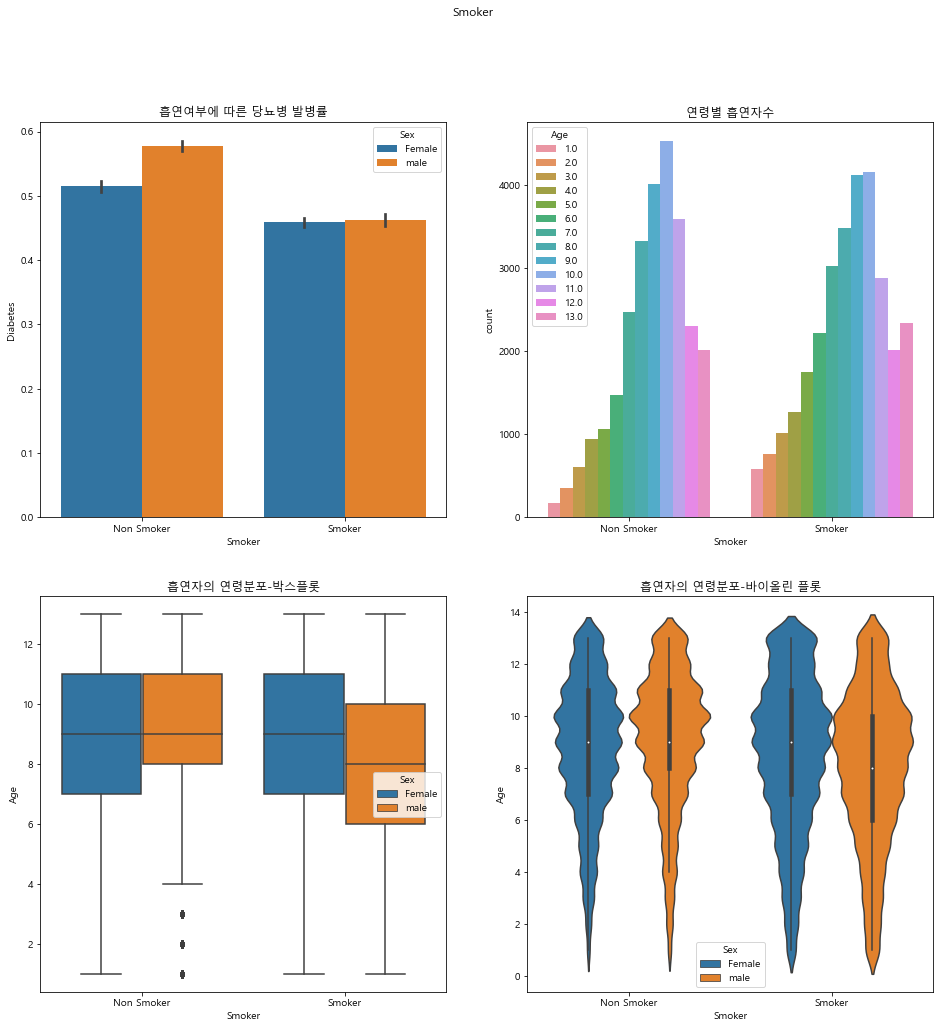

In [102]:
# 흡연여부에 따른 당뇨병과의 상관관계
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,16))
plt.rcParams['font.family'] = 'Malgun Gothic'
fig.suptitle('Smoker')

axes[0][0].set_title('흡연여부에 따른 당뇨병 발병률')
sns.barplot(x='Smoker', y='Diabetes', hue='Sex', data=eda_df, ax=axes[0][0])

axes[0][1].set_title('연령별 흡연자수')
sns.countplot(x='Smoker', hue='Age', data=eda_df, ax=axes[0][1])

axes[1][0].set_title('흡연자의 연령분포-박스플롯')
sns.boxplot(x='Smoker', y='Age', data=eda_df, hue='Sex',ax=axes[1][0])

axes[1][1].set_title('흡연자의 연령분포-바이올린 플롯')
sns.violinplot(x='Smoker', y='Age', data=eda_df, hue='Sex',ax=axes[1][1])
plt.show()

- 흡연을 하는 사람이 당뇨병 발병률이 높음
- 일반적으로 여자보다 남자가 당뇨병 발병률이 높은 경향성을 보임
- 연령대가 높아질수록 흡연을 많이 하는것으로 보이나 나이대 10(60~75세 정도)이후에는 오히려 감소하는 양상을 보임

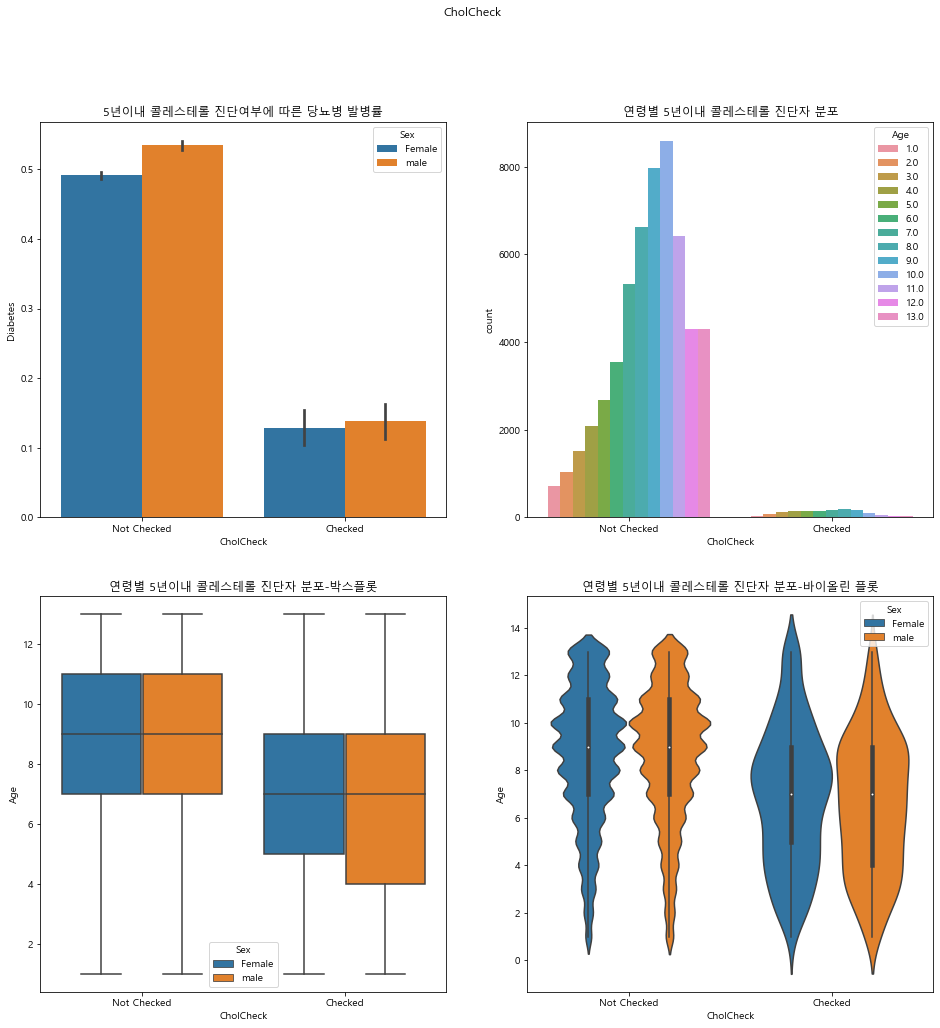

In [100]:
#콜레스테롤 체크여부에 따른 당뇨병 발병률

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,16))
plt.rcParams['font.family'] = 'Malgun Gothic'
fig.suptitle('CholCheck')

axes[0][0].set_title('5년이내 콜레스테롤 진단여부에 따른 당뇨병 발병률')
sns.barplot(x='CholCheck', y='Diabetes', hue='Sex', data=eda_df, ax=axes[0][0])

axes[0][1].set_title('연령별 5년이내 콜레스테롤 진단자 분포')
sns.countplot(x='CholCheck', hue='Age', data=eda_df, ax=axes[0][1])

axes[1][0].set_title('연령별 5년이내 콜레스테롤 진단자 분포-박스플롯')
sns.boxplot(x='CholCheck', y='Age', data=eda_df, hue='Sex',ax=axes[1][0])

axes[1][1].set_title('연령별 5년이내 콜레스테롤 진단자 분포-바이올린 플롯')
sns.violinplot(x='CholCheck', y='Age', data=eda_df, hue='Sex',ax=axes[1][1])
plt.show()

- 5년이내에 콜레스테롤 진단을 받은 군이 당뇨병 발생률이 현저하게 낮음
- 콜레스테롤 진단을 받은 군은 그렇지 않은 군보다 연령분포가 고른 양상을 보임
- 콜레스테롤 진단을 받은 군은 그렇지 않은 군보다 표본 수가 현저하게 작음

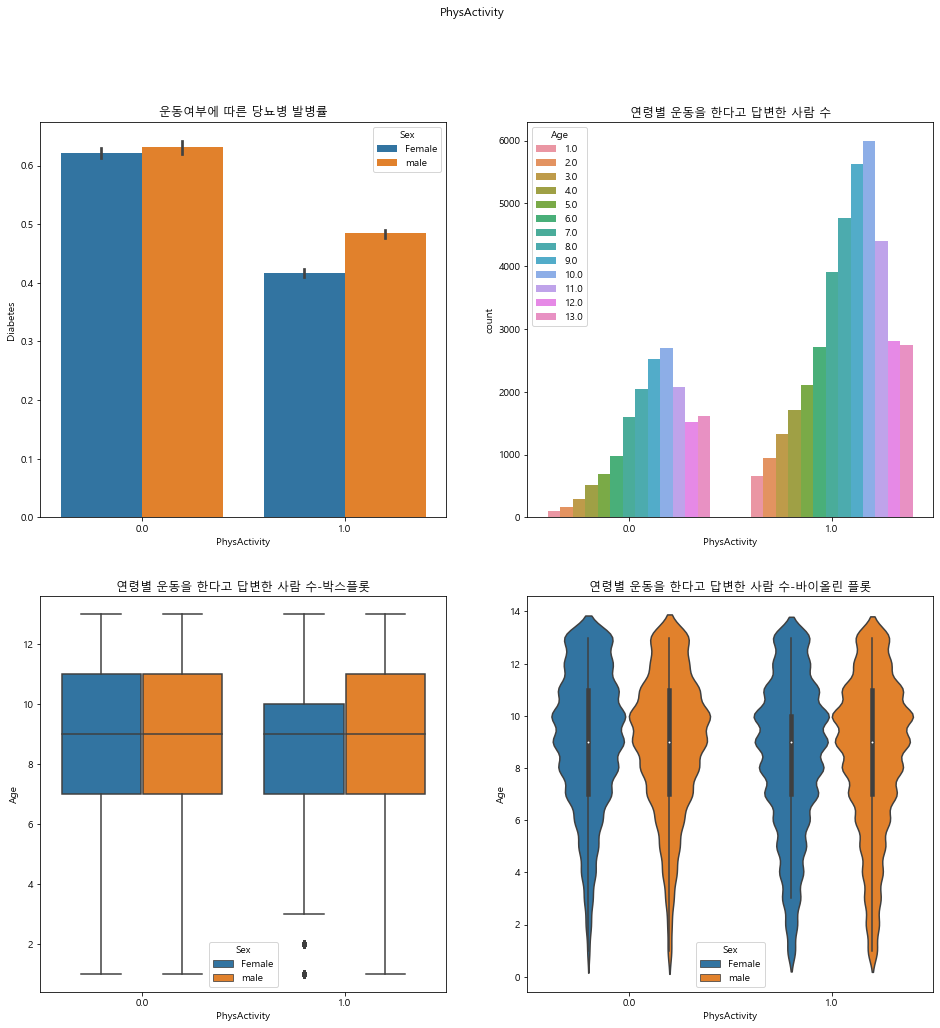

In [103]:
#30일 이내 운동 여부에 따른 당뇨병 발병률
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(16,16))
plt.rcParams['font.family'] = 'Malgun Gothic'
fig.suptitle('PhysActivity')

axes[0][0].set_title('운동여부에 따른 당뇨병 발병률')
sns.barplot(x='PhysActivity', y='Diabetes', hue='Sex', data=eda_df, ax=axes[0][0])

axes[0][1].set_title('연령별 운동을 한다고 답변한 사람 수')
sns.countplot(x='PhysActivity', hue='Age', data=eda_df, ax=axes[0][1])

axes[1][0].set_title('연령별 운동을 한다고 답변한 사람 수-박스플롯')
sns.boxplot(x='PhysActivity', y='Age', data=eda_df, hue='Sex',ax=axes[1][0])

axes[1][1].set_title('연령별 운동을 한다고 답변한 사람 수-바이올린 플롯')
sns.violinplot(x='PhysActivity', y='Age', data=eda_df, hue='Sex',ax=axes[1][1])
plt.show()

- 30일 이내에 운동을 했을 때 당뇨병 발병률이 더 낮음

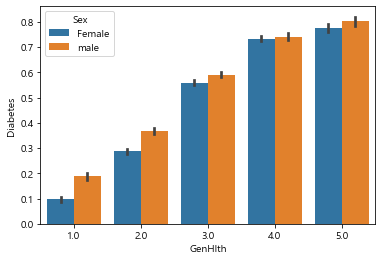

In [66]:
#건강상태인식에 따른 당뇨병 발병률
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=eda_df,)
plt.show()

- 자신의 건강상태에 대한 인식이 나쁠수록 당뇨병 발병률이 높음

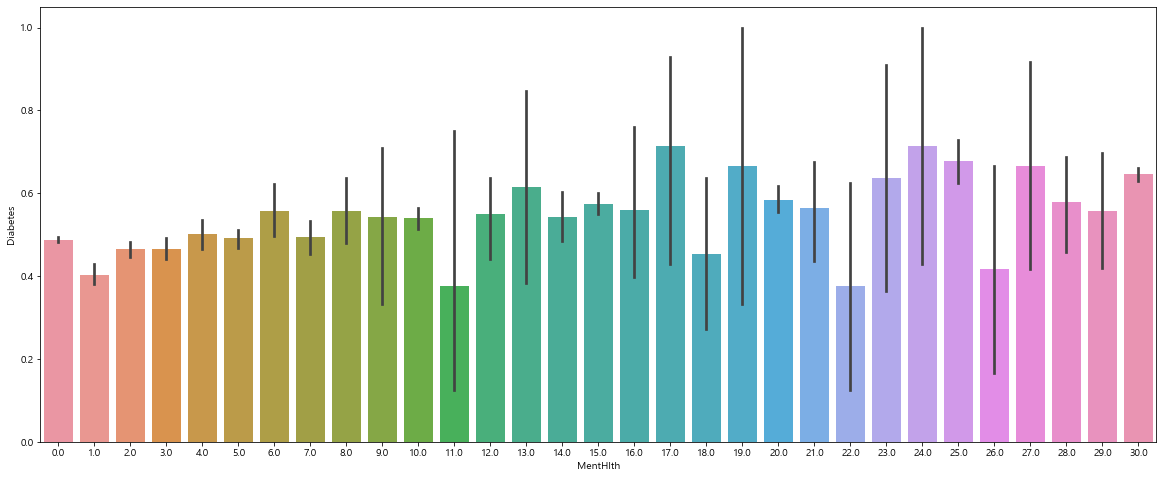

In [67]:
#정신건강인식에 따른 당뇨병 발병률
plt.figure(figsize=(20,8))

sns.barplot(x='MentHlth', y='Diabetes', data=eda_df,)
plt.show()

- 대체적으로 정신건강상태가 좋지 않은 날 수가 많을수록 당뇨병 발병률이 높은 것으로 보이나 시각화만으론 정신건강상태인식과 당뇨병과의 상관관계가 보이지 않음


### 은영

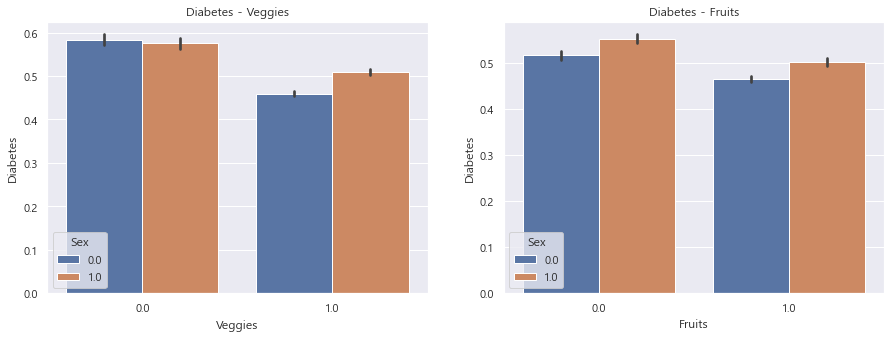

In [45]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='Veggies', y='Diabetes', hue='Sex', data=df, ax=ax1)

# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='Fruits', y='Diabetes', hue='Sex', data=df, ax=ax2)

# 차트 제목 표시
ax1.set_title('Diabetes - Veggies')
ax2.set_title('Diabetes - Fruits')

plt.show()

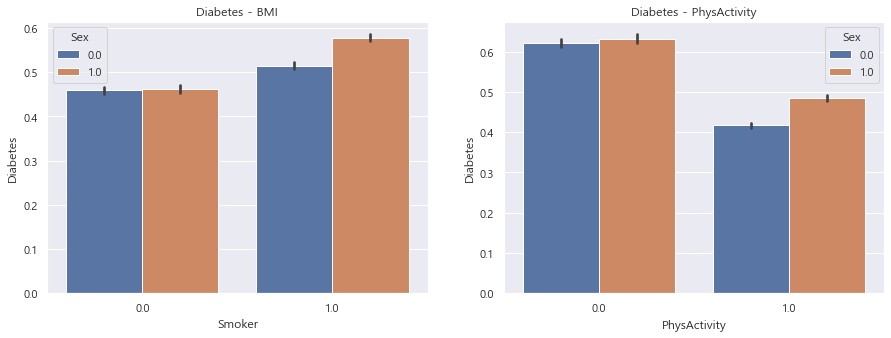

In [46]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='Smoker', y='Diabetes', hue='Sex', data=df, ax=ax1)

# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='PhysActivity', y='Diabetes', hue='Sex', data=df, ax=ax2)

# 차트 제목 표시
ax1.set_title('Diabetes - BMI')
ax2.set_title('Diabetes - PhysActivity')


plt.show()

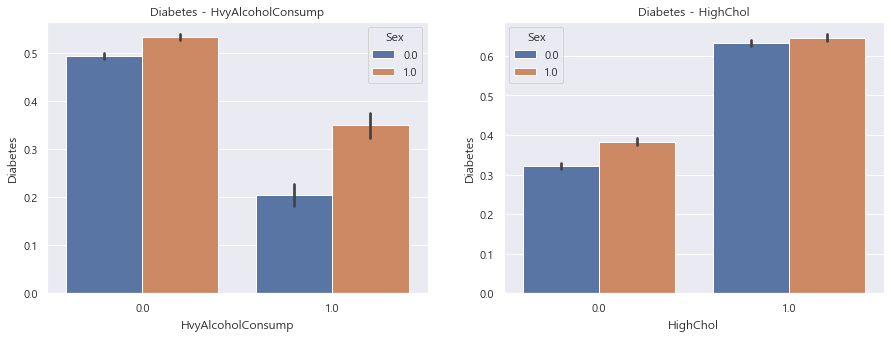

In [47]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='HvyAlcoholConsump', y='Diabetes', hue='Sex', data=df, ax=ax1)
sns.barplot(x='HighChol', y='Diabetes', hue='Sex', data=df, ax=ax2)

# 차트 제목 표시
ax1.set_title('Diabetes - HvyAlcoholConsump')
ax2.set_title('Diabetes - HighChol')

plt.show()

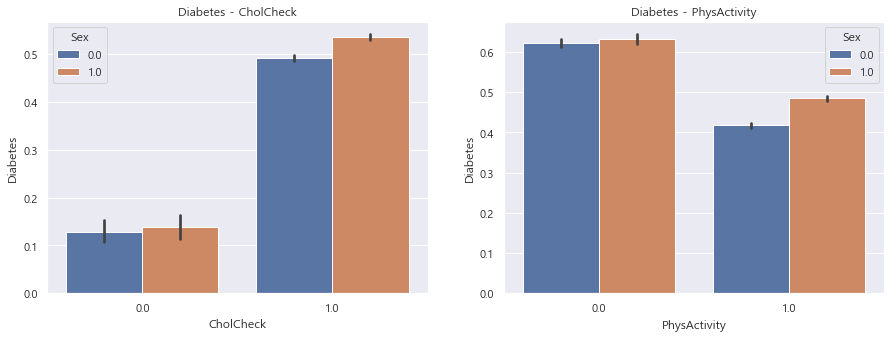

In [48]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='CholCheck', y='Diabetes', hue='Sex', data=df, ax=ax1)
sns.barplot(x='PhysActivity', y='Diabetes', hue='Sex', data=df, ax=ax2)

# 차트 제목 표시
ax1.set_title('Diabetes - CholCheck')
ax2.set_title('Diabetes - PhysActivity')

plt.show()

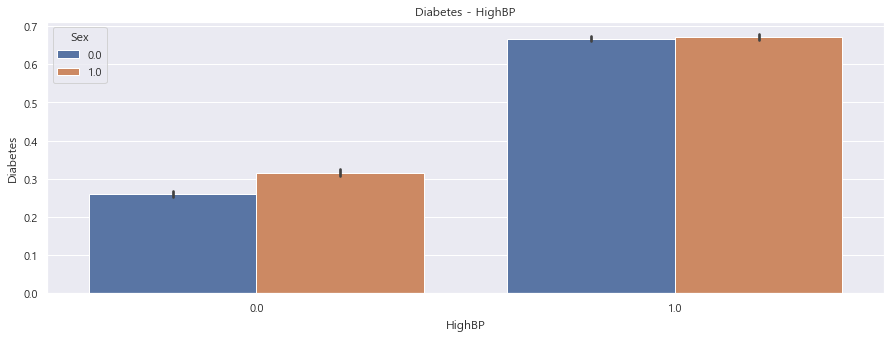

In [49]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,1,1)

# x축, y축에 변수 할당 후, hue 옵션 추가
sns.barplot(x='HighBP', y='Diabetes', hue='Sex', data=df, ax=ax1)

# 차트 제목 표시
ax1.set_title('Diabetes - HighBP')

plt.show()

<AxesSubplot:xlabel='Diabetes', ylabel='BMI'>

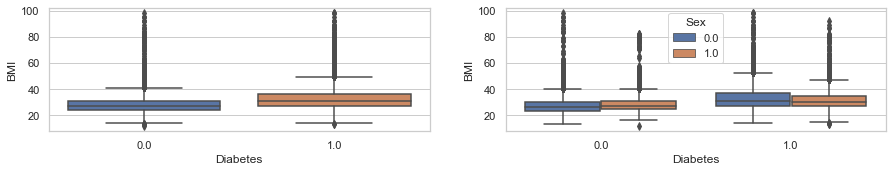

In [50]:
# set style theme
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# 박스 플롯 - 기본값
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax1)

# 박스플롯 - hue 변수 추가
sns.boxplot(x='Diabetes', y='BMI', hue='Sex', data=df, ax=ax2)


# BMI와 성별 이상치가 너무 많다.

<AxesSubplot:xlabel='Diabetes', ylabel='BMI'>

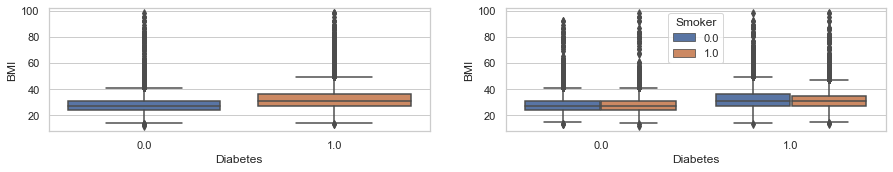

In [51]:
# set style theme
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# 박스 플롯 - 기본값
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax1)

# 박스플롯 - hue 변수 추가
sns.boxplot(x='Diabetes', y='BMI', hue='Smoker', data=df, ax=ax2)

# BMI와 담배 이상치가 너무 많다.

<AxesSubplot:xlabel='Diabetes', ylabel='BMI'>

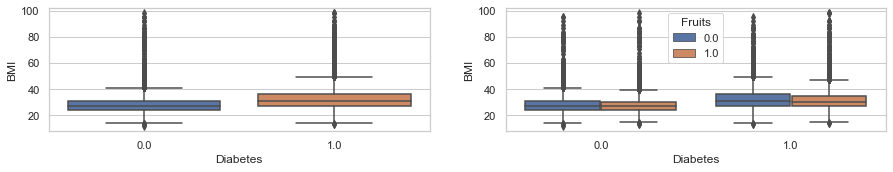

In [52]:
# set style theme
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# 박스 플롯 - 기본값
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax1)

# 박스플롯 - hue 변수 추가
sns.boxplot(x='Diabetes', y='BMI', hue='Fruits', data=df, ax=ax2)


# BMI와 과일 이상치가 너무 많다.

<AxesSubplot:xlabel='Diabetes', ylabel='BMI'>

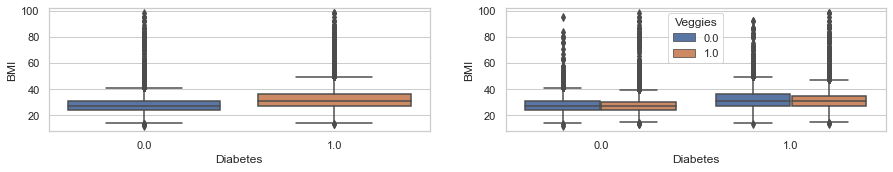

In [53]:
# set style theme
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# 박스 플롯 - 기본값
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax1)

# 박스플롯 - hue 변수 추가
sns.boxplot(x='Diabetes', y='BMI', hue='Veggies', data=df, ax=ax2)

# BMI와 채소 이상치가 너무 많다.

<AxesSubplot:xlabel='Diabetes', ylabel='BMI'>

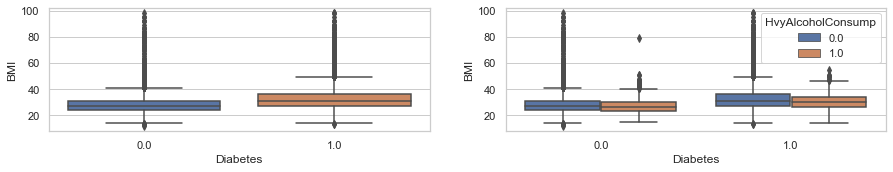

In [54]:
# set style theme
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# 박스 플롯 - 기본값
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax1)

# 박스플롯 - hue 변수 추가
sns.boxplot(x='Diabetes', y='BMI', hue='HvyAlcoholConsump', data=df, ax=ax2)

# 설명: BMI 음주 이상치가 너무 많다.

C:\Users\kh983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kh983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kh983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

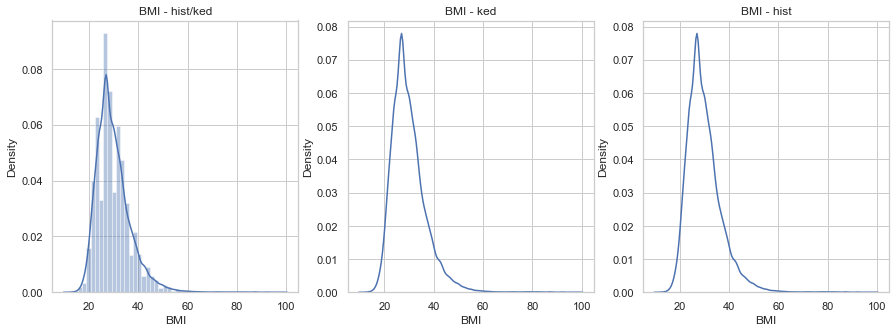

In [55]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.distplot(df['BMI'], ax=ax1)

# hist = False
sns.distplot(df['BMI'], hist =False, ax=ax2)

# kde = False
sns.distplot(df['BMI'], hist =False, ax=ax3)

# 차트 제목 표시
ax1.set_title('BMI - hist/ked')
ax2.set_title('BMI - ked')
ax3.set_title('BMI - hist')

plt.show()

C:\Users\kh983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kh983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kh983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

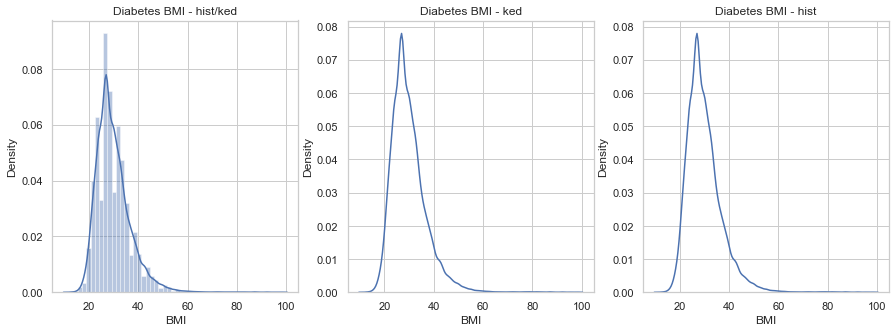

In [56]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.distplot(df['BMI'], ax=ax1)

# hist = False
sns.distplot(df['BMI'], hist =False, ax=ax2)

# kde = False
sns.distplot(df['BMI'], hist =False, ax=ax3)

# 차트 제목 표시
ax1.set_title('Diabetes BMI - hist/ked')
ax2.set_title('Diabetes BMI - ked')
ax3.set_title('Diabetes BMI - hist')

plt.show()

In [57]:
table = df.pivot_table(index=['Diabetes'], columns=['Sex'], aggfunc='size')

<AxesSubplot:xlabel='Sex', ylabel='Diabetes'>

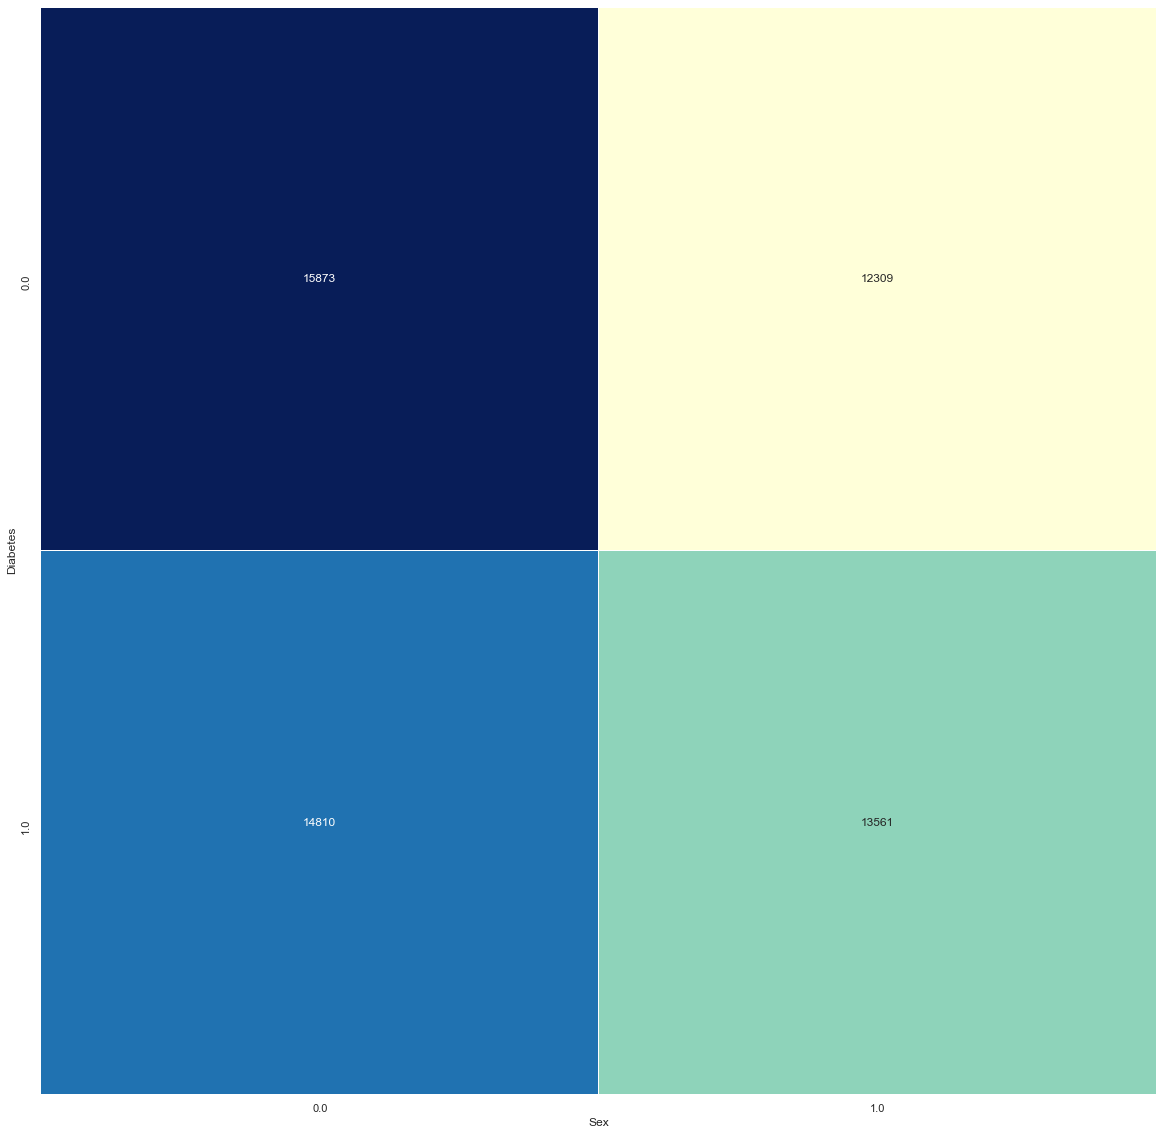

In [58]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 설명: 여성이 남성보다 당뇨병에 걸릴 확률이 높다.

In [59]:
table = df.pivot_table(index=['Diabetes'], columns=['HighChol'], aggfunc='size')

<AxesSubplot:xlabel='HighChol', ylabel='Diabetes'>

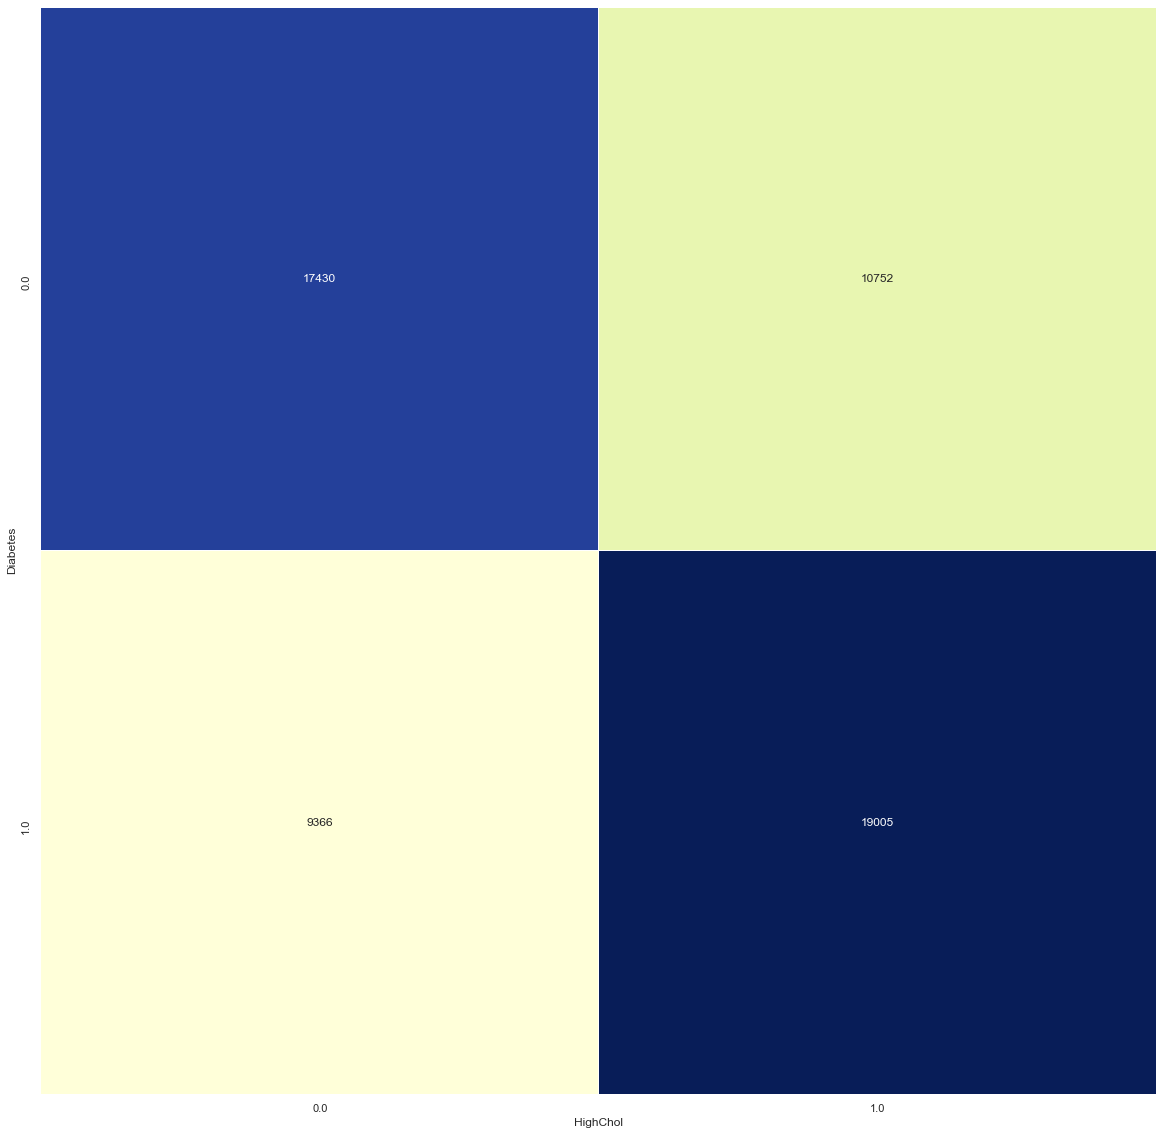

In [60]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 설명: 콜레스테롤 수치가 높은 사람이 당뇨병에 걸릴 확률이 높다.

In [61]:
table = df.pivot_table(index=['Diabetes'], columns=['CholCheck'], aggfunc='size')

<AxesSubplot:xlabel='CholCheck', ylabel='Diabetes'>

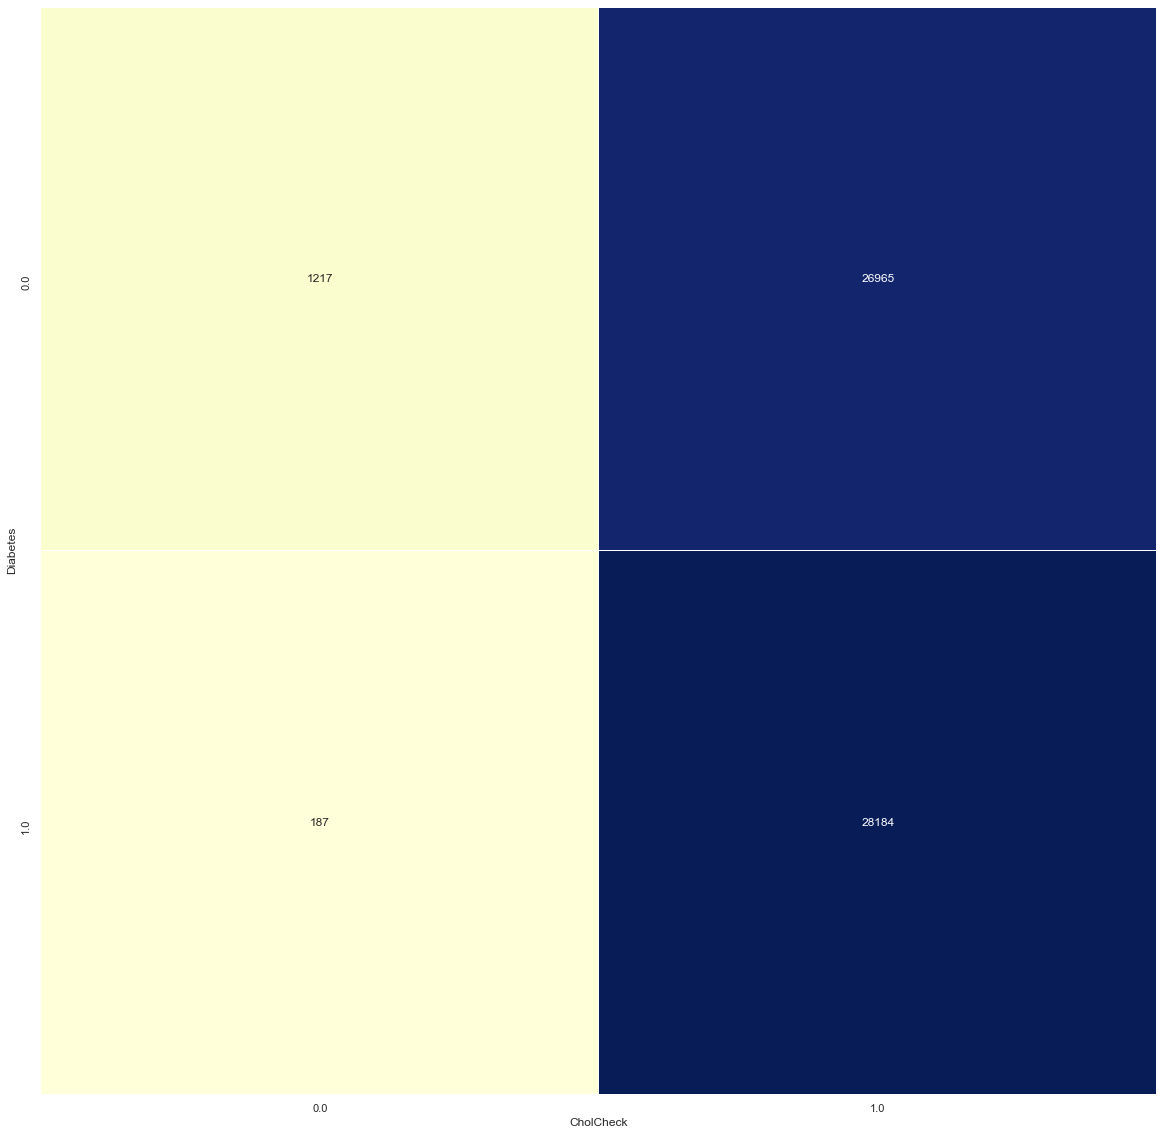

In [62]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 설명: 5년동안 콜레스테롤 체크한 사람이 당뇨병에 걸릴 높다.

In [63]:
table = df.pivot_table(index=['Diabetes'], columns=['Smoker'], aggfunc='size')

<AxesSubplot:xlabel='Smoker', ylabel='Diabetes'>

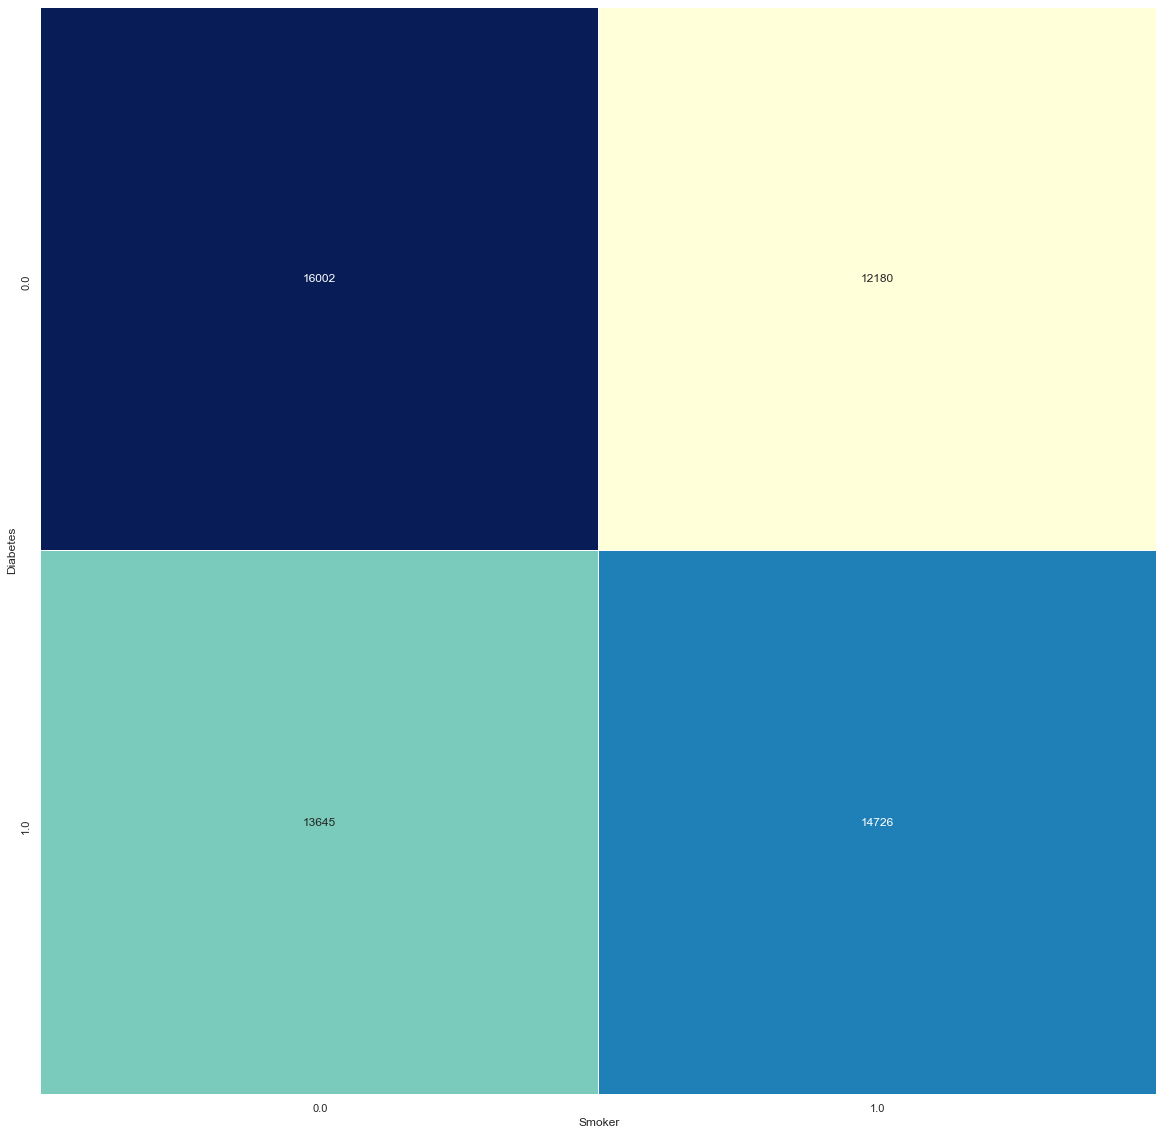

In [64]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 설명: 담배핀 사람이 당뇨병에 걸릴 확률이 높다.

In [65]:
table = df.pivot_table(index=['Diabetes'], columns=['Fruits'], aggfunc='size')

<AxesSubplot:xlabel='Fruits', ylabel='Diabetes'>

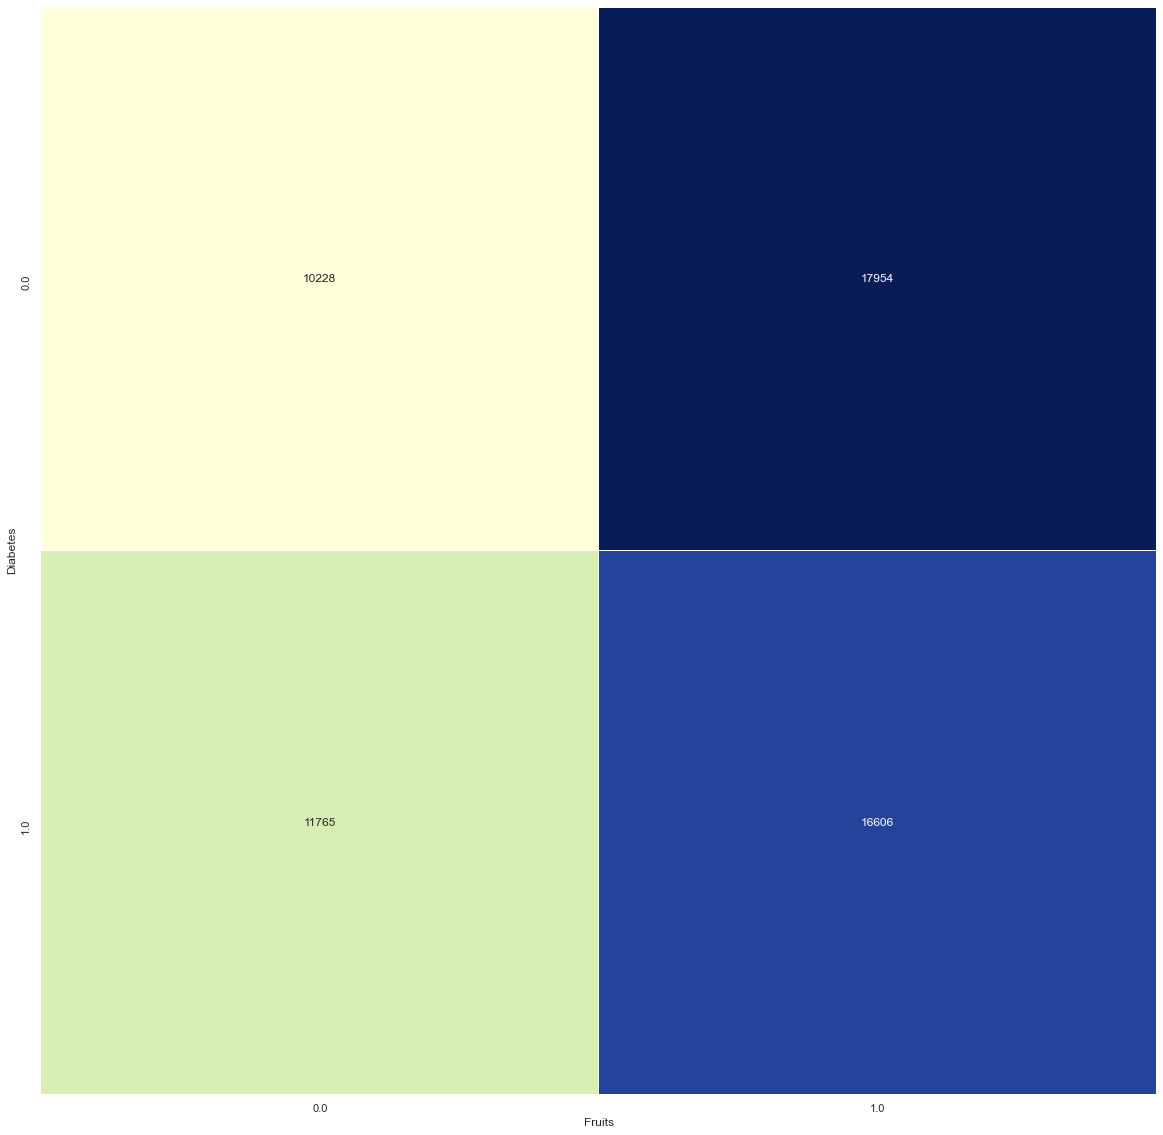

In [66]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 과일을 먹은 사람이 당뇨병에 걸릴 확률이 높다.

In [67]:
table = df.pivot_table(index=['Diabetes'], columns=['Veggies'], aggfunc='size')

<AxesSubplot:xlabel='Veggies', ylabel='Diabetes'>

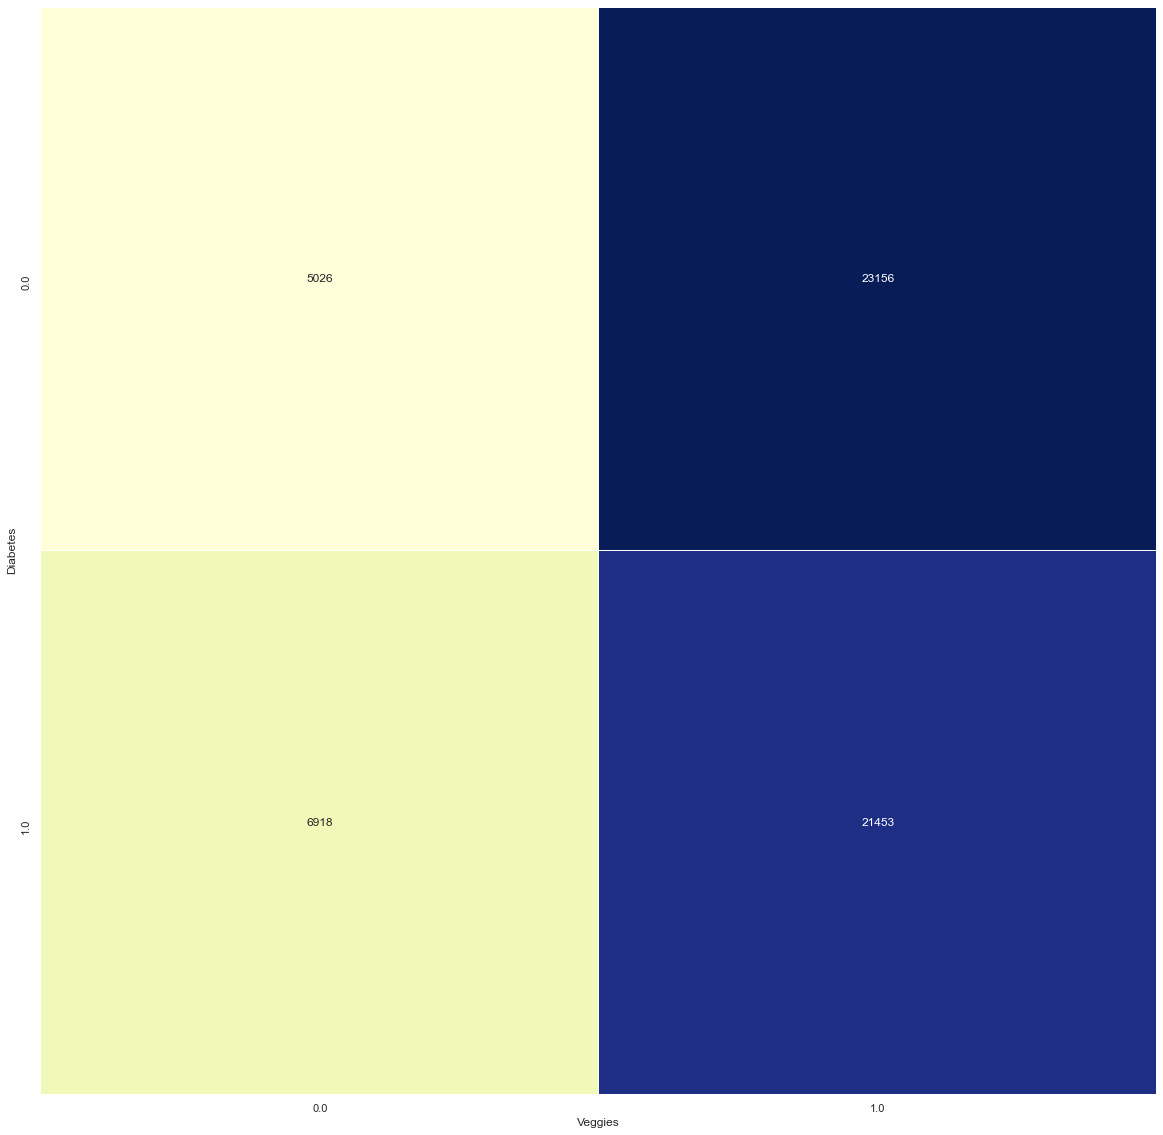

In [68]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 채소를 많이 먹은 사람이 당뇨병에 걸릴확률이 낮다.

In [69]:
table = df.pivot_table(index=['Diabetes'], columns=['HvyAlcoholConsump'], aggfunc='size')

<AxesSubplot:xlabel='HvyAlcoholConsump', ylabel='Diabetes'>

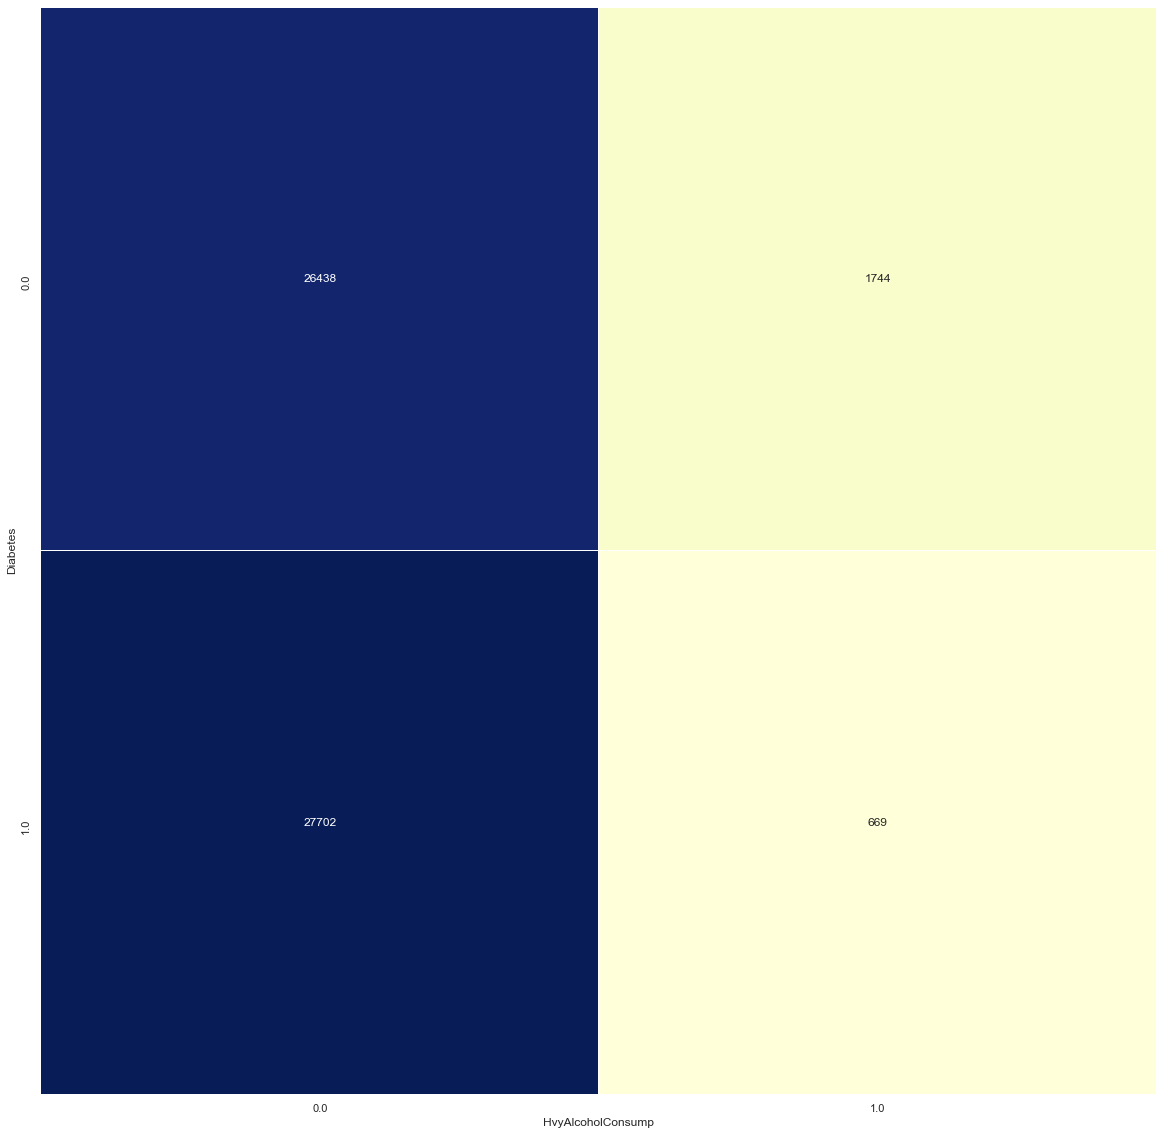

In [70]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 설명: 음주한 사람보다 음주를 안 한 사람이 오히려 당뇨병에 걸릴 확률이 높게 나왔다.

In [71]:
table = df.pivot_table(index=['Diabetes'], columns=['PhysActivity'], aggfunc='size')

<AxesSubplot:xlabel='PhysActivity', ylabel='Diabetes'>

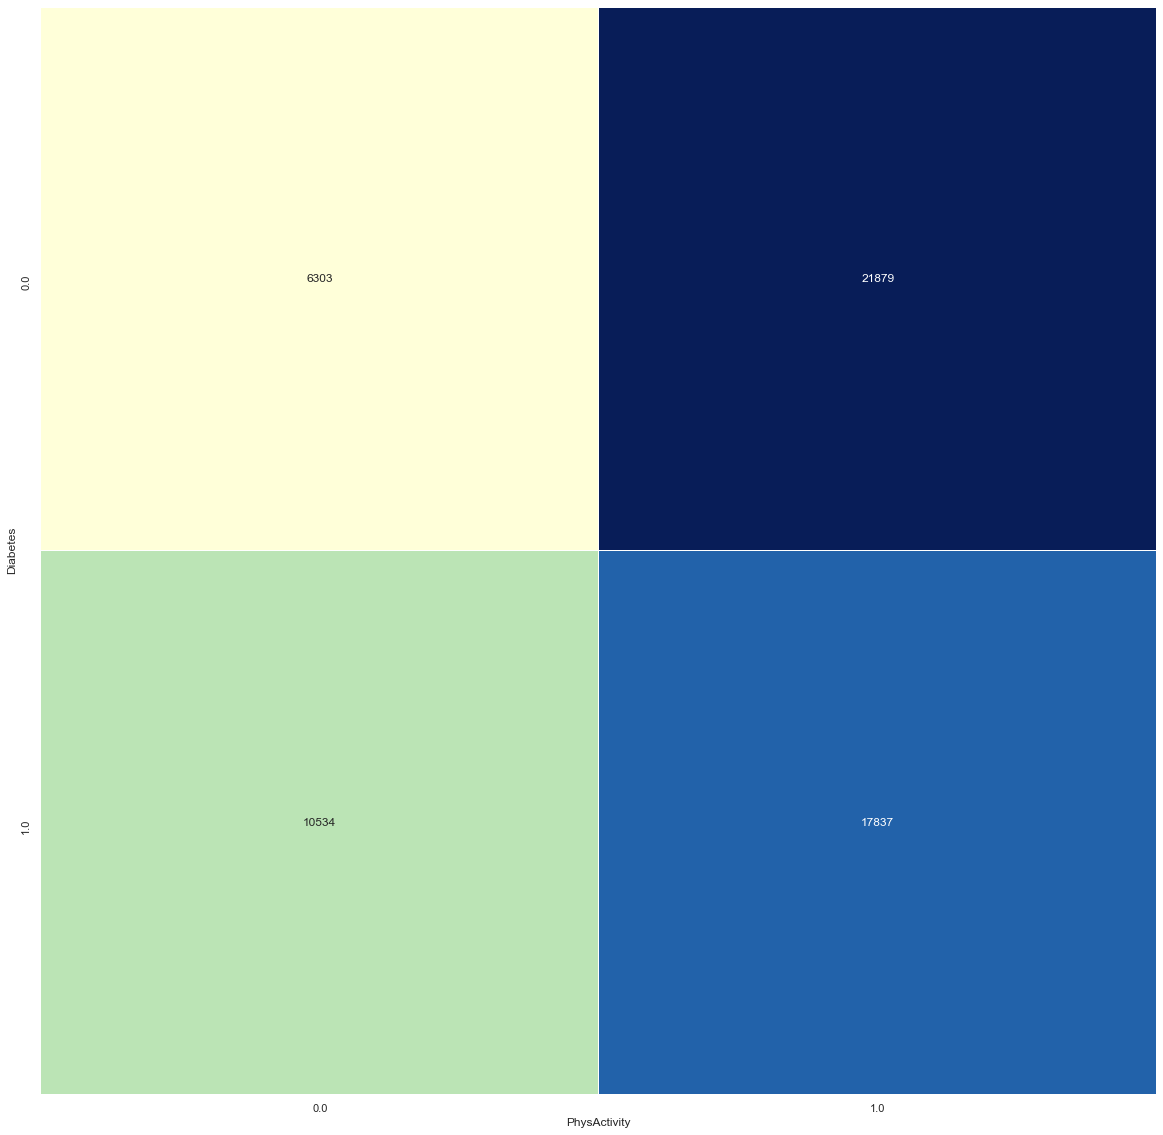

In [72]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 설명: 30일내에 운동한 사람보다 운동 안 한 사람이 당뇨병에 걸릴 확률이 높다.

In [73]:
table = df.pivot_table(index=['Diabetes'], columns=['HighBP'], aggfunc='size')

<AxesSubplot:xlabel='HighBP', ylabel='Diabetes'>

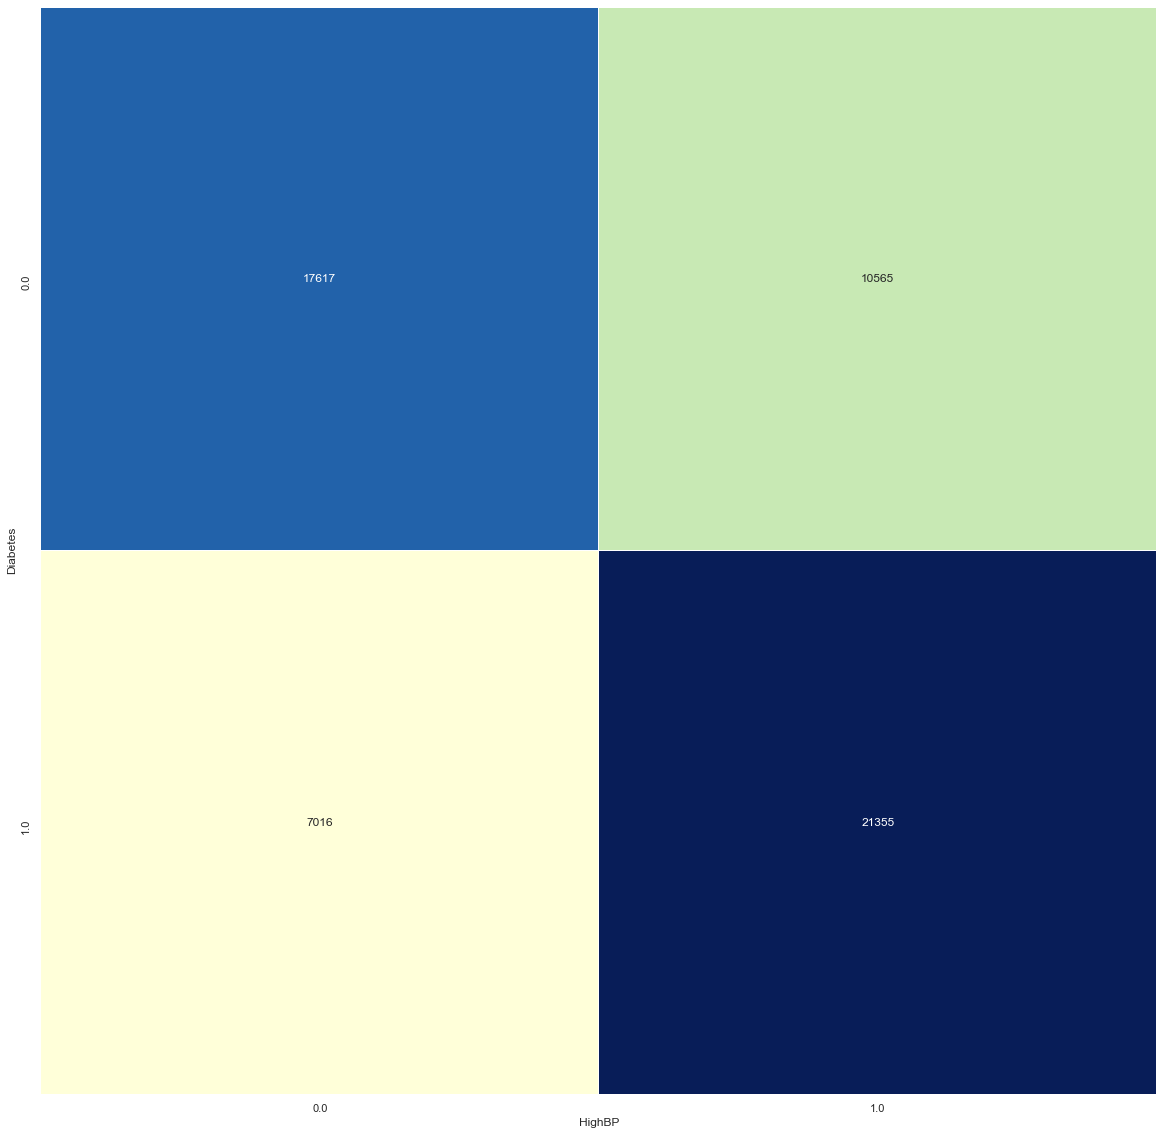

In [74]:
# 히트맵 그리기
sns.heatmap(table, 
           annot=True, fmt='d',
           cmap='YlGnBu',
           linewidth=0.5,
           cbar=False)

# 혈앞이 높은 사람이 당뇨병에 걸릴 확률이 높다.